# ANALYST ONLINE CAMPAIGNS FOR MARKETING DEPT

### Data are extracted from a centralized database and stored in the attached file called “mkt_data.csv”.
### The schema for this dataset is as follow:

●	id: Integer, representing each message

●	send_date: data, date when SMS/Email was sent

●	estimated_age: Integer, ranging from 0 to 100

●	age_range: string. The audience is divided into 4 age ranges

●	channel: string, either SMS or Email

●	coupon: float, the value of coupon expressed in each message, valid for up to 3 units for each order

●	clicked: binary, either 0 (customer doesn’t click on the link in SMS/Email) or 1 (they clicked)

●	last_step: string. It can have one of the following values: “received”, “bounced”, “saw review”, “added to cart”, “payment page”, “purchased”

●	nb_units: integer, representing the number of units of customers’ order.

●	order_value: float, representing the value of the order the customer made. Already minus the coupon applied.

### The column “last_step” is the final point of contact with customers before they leave our website. Its values are explained below:

● received: sms/email sent successfully, but not clicked.

● bounced: they clicked but exited immediately.

● saw review: scroll down and read the review and information of the product

● added to cart: customers added the product to cart to check out

● payment page: they stopped at payment without finishing it

● purchased: they made an order


### Financial Information

Together with the data above, you have additional information about the production cost and the
marketing campaigns.

● The production cost for each razor is 18$.

● Cost per one SMS is 0.050$

● Cost  per  one  email  sent  is  0.075$.

● Each email or SMS will be supplied with a coupon that can have a value of 2$, 4$ or 6$. The coupon is valid for up to 3 razors in each order. They have the option to wrap the items as a gift. Ignore wrapping and shipping costs.

● The price without coupons is 40$ / razor.

● From experience (and some models), potential customers are divided into 4 age groups:

○ 18 - 30

○ 31 - 45

○ 46 - 60

○ 60 +

In [1]:
# Import libs
import os 
import pandas as pd 
import numpy as np

In [2]:
os.chdir(r'C:\Users\Admin\Pytraining')

In [3]:
mkt_df = pd.read_csv('mkt_data.csv')

In [6]:
mkt_df

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,1,2019-04-12,59,46-60,SMS,2,0,received,0,0
1,2,2019-04-08,27,18-30,Email,2,0,received,0,0
2,3,2019-04-05,74,60+,Email,2,0,received,0,0
3,4,2019-04-21,32,31-45,SMS,2,0,received,0,0
4,5,2019-04-28,42,31-45,Email,2,0,received,0,0
...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-04-26,23,18-30,Email,2,0,received,0,0
299996,299997,2019-04-30,52,46-60,SMS,4,0,received,0,0
299997,299998,2019-04-22,20,18-30,SMS,2,0,received,0,0
299998,299999,2019-04-04,53,46-60,SMS,2,0,received,0,0


In [7]:
# Rename last_step -> status
mkt_df['status'] = mkt_df['last_step']
mkt_df.drop('last_step', axis = 1, inplace = True)
mkt_df

,id,send_date,estimated_age,age_range,channel,coupon,clicked,nb_units,order_value,status
0,1,2019-04-12,59,46-60,SMS,2,0,0,0,received
1,2,2019-04-08,27,18-30,Email,2,0,0,0,received
2,3,2019-04-05,74,60+,Email,2,0,0,0,received
3,4,2019-04-21,32,31-45,SMS,2,0,0,0,received
4,5,2019-04-28,42,31-45,Email,2,0,0,0,received
...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-04-26,23,18-30,Email,2,0,0,0,received
299996,299997,2019-04-30,52,46-60,SMS,4,0,0,0,received
299997,299998,2019-04-22,20,18-30,SMS,2,0,0,0,received
299998,299999,2019-04-04,53,46-60,SMS,2,0,0,0,received


In [8]:
# Create new_col names 'Cost_channel '  for channel
cost_list = []
for i in range(len(mkt_df)):
    if mkt_df['channel'][i] == 'SMS': 
        cost_list.append(0.050)
    
    else:
        cost_list.append(0.075)
    
mkt_df['cost_channel'] = cost_list

In [9]:
mkt_df

,id,send_date,estimated_age,age_range,channel,coupon,clicked,nb_units,order_value,status,cost_channel
0,1,2019-04-12,59,46-60,SMS,2,0,0,0,received,0.050
1,2,2019-04-08,27,18-30,Email,2,0,0,0,received,0.075
2,3,2019-04-05,74,60+,Email,2,0,0,0,received,0.075
3,4,2019-04-21,32,31-45,SMS,2,0,0,0,received,0.050
4,5,2019-04-28,42,31-45,Email,2,0,0,0,received,0.075
...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-04-26,23,18-30,Email,2,0,0,0,received,0.075
299996,299997,2019-04-30,52,46-60,SMS,4,0,0,0,received,0.050
299997,299998,2019-04-22,20,18-30,SMS,2,0,0,0,received,0.050
299998,299999,2019-04-04,53,46-60,SMS,2,0,0,0,received,0.050


In [10]:
# Insight 1: which  age_range is more likely to clicked?
age_range_click = pd.pivot_table(mkt_df,index ='age_range', values ='clicked', aggfunc =np.mean)
age_range_click.reset_index(inplace=True)
age_range_click

,age_range,clicked
0,18-30,0.060770
1,31-45,0.063287
2,46-60,0.064154
3,60+,0.021494


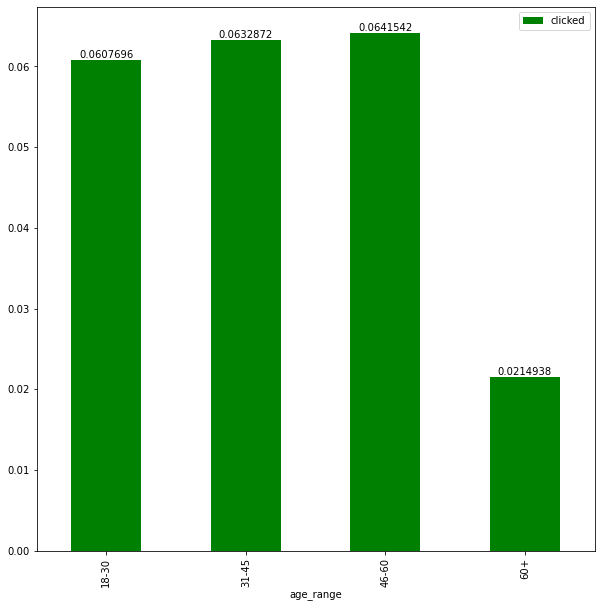

In [11]:
bar = age_range_click.plot.bar(x ='age_range',y ='clicked',figsize =(10,10), color ='Green');
bar.bar_label(bar.containers[0]);

In [12]:
# Insight 2: which age_range is more likely to coupon?
age_range_coupon = pd.pivot_table(mkt_df,index =['channel','age_range','coupon'], values ='order_value', aggfunc =np.sum)
age_range_coupon.reset_index(inplace=True)
age_range_coupon

,channel,age_range,coupon,order_value
0,Email,18-30,2,7980
1,Email,18-30,4,5688
2,Email,18-30,6,1836
3,Email,31-45,2,21432
4,Email,31-45,4,7200
5,Email,31-45,6,3842
6,Email,46-60,2,3382
7,Email,46-60,4,1224
8,Email,46-60,6,1598
9,Email,60+,2,0


In [13]:
# Distribution coupon to 2, 4, 6 according to age_range
coupon_2 = age_range_coupon[age_range_coupon['coupon'] == 2]
coupon_4 = age_range_coupon[age_range_coupon['coupon'] == 4]
coupon_6 = age_range_coupon[age_range_coupon['coupon'] == 6]

In [14]:
coupon_2

,channel,age_range,coupon,order_value
0,Email,18-30,2,7980
3,Email,31-45,2,21432
6,Email,46-60,2,3382
9,Email,60+,2,0
12,SMS,18-30,2,18282
15,SMS,31-45,2,8474
18,SMS,46-60,2,8300
21,SMS,60+,2,190


In [15]:
coupon_4

,channel,age_range,coupon,order_value
1,Email,18-30,4,5688
4,Email,31-45,4,7200
7,Email,46-60,4,1224
10,Email,60+,4,108
13,SMS,18-30,4,6228
16,SMS,31-45,4,2736
19,SMS,46-60,4,6984
22,SMS,60+,4,180


In [16]:
coupon_6

,channel,age_range,coupon,order_value
2,Email,18-30,6,1836
5,Email,31-45,6,3842
8,Email,46-60,6,1598
11,Email,60+,6,34
14,SMS,18-30,6,4114
17,SMS,31-45,6,2074
20,SMS,46-60,6,3978
23,SMS,60+,6,0


In [18]:
#Insight 7 :Compare coupon for affecting to age_range to purchased order
purchased =  mkt_df[mkt_df['status'] == 'purchased']
purchased

,id,send_date,estimated_age,age_range,channel,coupon,clicked,nb_units,order_value,status,cost_channel
70,71,2019-04-25,24,18-30,Email,2,1,1,38,purchased,0.075
116,117,2019-05-01,40,31-45,Email,2,1,3,114,purchased,0.075
531,532,2019-04-14,22,18-30,Email,4,1,2,72,purchased,0.075
658,659,2019-04-03,53,46-60,SMS,2,1,30,1194,purchased,0.050
664,665,2019-04-01,43,31-45,Email,4,1,1,36,purchased,0.075
...,...,...,...,...,...,...,...,...,...,...,...
299608,299609,2019-04-24,31,31-45,Email,4,1,2,72,purchased,0.075
299621,299622,2019-04-24,20,18-30,SMS,2,1,1,38,purchased,0.050
299626,299627,2019-04-30,19,18-30,Email,2,1,2,76,purchased,0.075
299750,299751,2019-04-07,40,31-45,Email,4,1,1,36,purchased,0.075


In [22]:
age_range_purchased_coupon = pd.pivot_table(purchased,index =['age_range','channel','coupon'], values ='order_value', aggfunc =np.sum)
age_range_purchased_coupon.reset_index(inplace=True)
age_range_purchased_coupon

,age_range,channel,coupon,order_value
0,18-30,Email,2,7980
1,18-30,Email,4,5688
2,18-30,Email,6,1836
3,18-30,SMS,2,18282
4,18-30,SMS,4,6228
5,18-30,SMS,6,4114
6,31-45,Email,2,21432
7,31-45,Email,4,7200
8,31-45,Email,6,3842
9,31-45,SMS,2,8474


In [24]:
age_range_purchased_coupon.sort_values(by ='order_value',ascending =False, inplace =True)
age_range_purchased_coupon

,age_range,channel,coupon,order_value
6,31-45,Email,2,21432
3,18-30,SMS,2,18282
9,31-45,SMS,2,8474
15,46-60,SMS,2,8300
0,18-30,Email,2,7980
7,31-45,Email,4,7200
16,46-60,SMS,4,6984
4,18-30,SMS,4,6228
1,18-30,Email,4,5688
5,18-30,SMS,6,4114


In [26]:
# Coupon for Email channel 
age_range_purchased_coupon_email = age_range_purchased_coupon[age_range_purchased_coupon['channel']=='Email']
age_range_purchased_coupon_email

,age_range,channel,coupon,order_value
6,31-45,Email,2,21432
0,18-30,Email,2,7980
7,31-45,Email,4,7200
1,18-30,Email,4,5688
8,31-45,Email,6,3842
12,46-60,Email,2,3382
2,18-30,Email,6,1836
14,46-60,Email,6,1598
13,46-60,Email,4,1224
18,60+,Email,4,108


In [27]:
age_range_purchased_coupon_email['order_value'] =age_range_purchased_coupon_email['order_value']/sum(age_range_purchased_coupon_email['order_value'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_46600\3670278082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_range_purchased_coupon_email['order_value'] =age_range_purchased_coupon_email['order_value']/sum(age_range_purchased_coupon_email['order_value'])


In [28]:
age_range_purchased_coupon_email

,age_range,channel,coupon,order_value
6,31-45,Email,2,0.394522
0,18-30,Email,2,0.146896
7,31-45,Email,4,0.132538
1,18-30,Email,4,0.104705
8,31-45,Email,6,0.070724
12,46-60,Email,2,0.062256
2,18-30,Email,6,0.033797
14,46-60,Email,6,0.029416
13,46-60,Email,4,0.022531
18,60+,Email,4,0.001988


In [29]:
# Coupon for SMS channel 
age_range_purchased_coupon_sms = age_range_purchased_coupon[age_range_purchased_coupon['channel']=='SMS']
age_range_purchased_coupon_sms

,age_range,channel,coupon,order_value
3,18-30,SMS,2,18282
9,31-45,SMS,2,8474
15,46-60,SMS,2,8300
16,46-60,SMS,4,6984
4,18-30,SMS,4,6228
5,18-30,SMS,6,4114
17,46-60,SMS,6,3978
10,31-45,SMS,4,2736
11,31-45,SMS,6,2074
20,60+,SMS,2,190


In [30]:
age_range_purchased_coupon_sms['order_value'] =age_range_purchased_coupon_sms['order_value']/sum(age_range_purchased_coupon_sms['order_value'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_46600\205413829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_range_purchased_coupon_sms['order_value'] =age_range_purchased_coupon_sms['order_value']/sum(age_range_purchased_coupon_sms['order_value'])


In [31]:
age_range_purchased_coupon_sms

,age_range,channel,coupon,order_value
3,18-30,SMS,2,0.297075
9,31-45,SMS,2,0.137699
15,46-60,SMS,2,0.134872
16,46-60,SMS,4,0.113487
4,18-30,SMS,4,0.101202
5,18-30,SMS,6,0.066851
17,46-60,SMS,6,0.064641
10,31-45,SMS,4,0.044459
11,31-45,SMS,6,0.033702
20,60+,SMS,2,0.003087


In [32]:
# Insight 3: which  age_range is more likely to clicked for the most channel?
age_range_channel = pd.pivot_table(mkt_df,index =['age_range','channel'], values ='clicked', aggfunc =np.mean)
age_range_channel.reset_index(inplace =True)
age_range_channel

,age_range,channel,clicked
0,18-30,Email,0.048157
1,18-30,SMS,0.071383
2,31-45,Email,0.076432
3,31-45,SMS,0.052328
4,46-60,Email,0.043259
5,46-60,SMS,0.081385
6,60+,Email,0.017446
7,60+,SMS,0.024863


In [33]:
# Counting % ange_range clicked for each channel
age_range_channel['clicked'] =age_range_channel['clicked']/sum(age_range_channel['clicked'])

In [34]:
age_range_channel

,age_range,channel,clicked
0,18-30,Email,0.115970
1,18-30,SMS,0.171903
2,31-45,Email,0.184060
3,31-45,SMS,0.126014
4,46-60,Email,0.104175
5,46-60,SMS,0.195990
6,60+,Email,0.042013
7,60+,SMS,0.059875


In [35]:
# Divide two channels for age_range
age_range_channel_email = age_range_channel[ age_range_channel['channel'] == 'Email']
age_range_channel_sms = age_range_channel[ age_range_channel['channel'] == 'SMS']

In [36]:
age_range_channel_email

,age_range,channel,clicked
0,18-30,Email,0.115970
2,31-45,Email,0.184060
4,46-60,Email,0.104175
6,60+,Email,0.042013


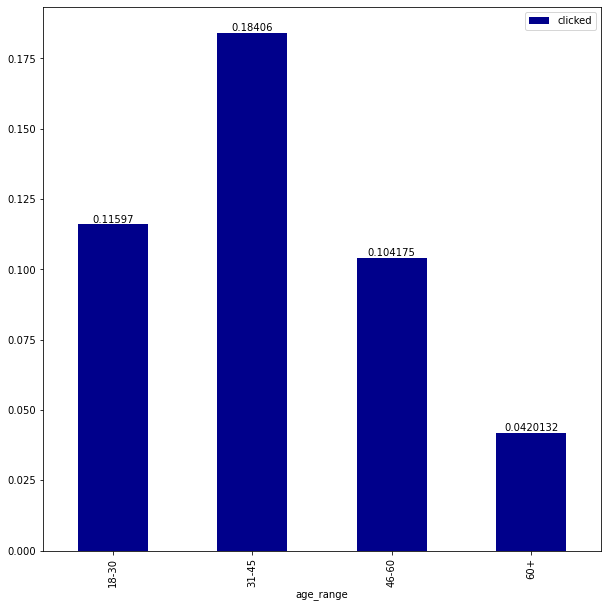

In [37]:
bar = age_range_channel_email.plot.bar(x ='age_range',y ='clicked',figsize =(10,10), color ='DarkBlue');
bar.bar_label(bar.containers[0]);

In [38]:
age_range_channel_sms

,age_range,channel,clicked
1,18-30,SMS,0.171903
3,31-45,SMS,0.126014
5,46-60,SMS,0.195990
7,60+,SMS,0.059875


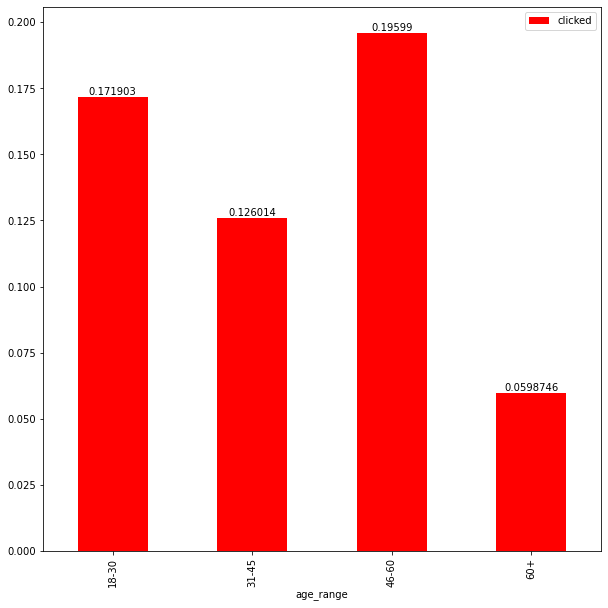

In [39]:
bar= age_range_channel_sms.plot.bar(x ='age_range',y ='clicked',figsize =(10,10), color ='Red');
bar.bar_label(bar.containers[0]);

In [40]:
# Divide mkt_df to small df
small_mkt_df = mkt_df[['age_range','channel','order_value','send_date','clicked','status']]
small_mkt_df

,age_range,channel,order_value,send_date,clicked,status
0,46-60,SMS,0,2019-04-12,0,received
1,18-30,Email,0,2019-04-08,0,received
2,60+,Email,0,2019-04-05,0,received
3,31-45,SMS,0,2019-04-21,0,received
4,31-45,Email,0,2019-04-28,0,received
...,...,...,...,...,...,...
299995,18-30,Email,0,2019-04-26,0,received
299996,46-60,SMS,0,2019-04-30,0,received
299997,18-30,SMS,0,2019-04-22,0,received
299998,46-60,SMS,0,2019-04-04,0,received


In [41]:
# Divide status cols to “received”, “bounced”, “saw review”, “added to cart”, “payment page”, “purchased”
received_st = small_mkt_df[small_mkt_df['status'] == 'received']
bounced_st =  small_mkt_df[small_mkt_df['status'] == 'bounced']
saw_review_st = small_mkt_df[small_mkt_df['status'] == 'saw review']
added_to_cart_st = small_mkt_df[small_mkt_df['status'] == 'added to cart']
payment_page_st = small_mkt_df[small_mkt_df['status'] == 'payment page']
purchased_st =  small_mkt_df[small_mkt_df['status'] == 'purchased']

In [42]:
received_st

,age_range,channel,order_value,send_date,clicked,status
0,46-60,SMS,0,2019-04-12,0,received
1,18-30,Email,0,2019-04-08,0,received
2,60+,Email,0,2019-04-05,0,received
3,31-45,SMS,0,2019-04-21,0,received
4,31-45,Email,0,2019-04-28,0,received
...,...,...,...,...,...,...
299995,18-30,Email,0,2019-04-26,0,received
299996,46-60,SMS,0,2019-04-30,0,received
299997,18-30,SMS,0,2019-04-22,0,received
299998,46-60,SMS,0,2019-04-04,0,received


In [43]:
# received: sms/email sent successfully, but not clicked.
received_st_email = received_st[received_st['channel'] == 'Email']
received_st_sms = received_st[received_st['channel'] == 'SMS']

In [44]:
received_st_email

,age_range,channel,order_value,send_date,clicked,status
1,18-30,Email,0,2019-04-08,0,received
2,60+,Email,0,2019-04-05,0,received
4,31-45,Email,0,2019-04-28,0,received
5,18-30,Email,0,2019-04-02,0,received
6,18-30,Email,0,2019-04-06,0,received
...,...,...,...,...,...,...
299986,46-60,Email,0,2019-04-22,0,received
299987,18-30,Email,0,2019-04-13,0,received
299988,18-30,Email,0,2019-04-29,0,received
299995,18-30,Email,0,2019-04-26,0,received


In [45]:
received_st_sms

,age_range,channel,order_value,send_date,clicked,status
0,46-60,SMS,0,2019-04-12,0,received
3,31-45,SMS,0,2019-04-21,0,received
9,18-30,SMS,0,2019-04-14,0,received
11,18-30,SMS,0,2019-04-25,0,received
12,31-45,SMS,0,2019-04-05,0,received
...,...,...,...,...,...,...
299993,18-30,SMS,0,2019-04-26,0,received
299994,31-45,SMS,0,2019-04-11,0,received
299996,46-60,SMS,0,2019-04-30,0,received
299997,18-30,SMS,0,2019-04-22,0,received


In [46]:
# bounced: they clicked but exited immediately.
bounced_st

,age_range,channel,order_value,send_date,clicked,status
26,31-45,Email,0,2019-04-19,1,bounced
51,46-60,Email,0,2019-04-21,1,bounced
64,31-45,SMS,0,2019-04-09,1,bounced
121,31-45,SMS,0,2019-04-25,1,bounced
235,46-60,SMS,0,2019-04-06,1,bounced
...,...,...,...,...,...,...
299483,46-60,SMS,0,2019-04-04,1,bounced
299549,46-60,SMS,0,2019-04-10,1,bounced
299813,31-45,Email,0,2019-04-14,1,bounced
299958,31-45,SMS,0,2019-04-22,1,bounced


In [47]:
bounced_st_email = bounced_st[bounced_st['channel'] == 'Email']
bounced_st_sms = bounced_st[bounced_st['channel'] == 'SMS']

In [48]:
bounced_st_email

,age_range,channel,order_value,send_date,clicked,status
26,31-45,Email,0,2019-04-19,1,bounced
51,46-60,Email,0,2019-04-21,1,bounced
254,60+,Email,0,2019-05-01,1,bounced
349,31-45,Email,0,2019-04-08,1,bounced
745,31-45,Email,0,2019-04-23,1,bounced
...,...,...,...,...,...,...
298994,18-30,Email,0,2019-04-26,1,bounced
299259,31-45,Email,0,2019-04-29,1,bounced
299327,18-30,Email,0,2019-04-22,1,bounced
299381,18-30,Email,0,2019-04-13,1,bounced


In [49]:
bounced_st_email = pd.pivot_table(bounced_st_email,index=['send_date','age_range','channel'],values ='clicked',aggfunc=np.sum)
bounced_st_email.reset_index(inplace =True)
bounced_st_email

,send_date,age_range,channel,clicked
0,2019-04-01,18-30,Email,29
1,2019-04-01,31-45,Email,44
2,2019-04-01,46-60,Email,15
3,2019-04-01,60+,Email,1
4,2019-04-02,18-30,Email,29
...,...,...,...,...
116,2019-04-30,60+,Email,2
117,2019-05-01,18-30,Email,38
118,2019-05-01,31-45,Email,57
119,2019-05-01,46-60,Email,11


In [50]:
bounced_st_email['clicked'] =bounced_st_email['clicked']/sum(bounced_st_email['clicked'])
bounced_st_email.sort_values(by='clicked',ascending=False,inplace=True)
bounced_st_email = bounced_st_email.head(100)
bounced_st_email

,send_date,age_range,channel,clicked
98,2019-04-26,31-45,Email,0.022444
35,2019-04-10,31-45,Email,0.021375
118,2019-05-01,31-45,Email,0.020306
110,2019-04-29,31-45,Email,0.019950
90,2019-04-24,31-45,Email,0.019594
...,...,...,...,...
26,2019-04-07,60+,Email,0.001425
112,2019-04-29,60+,Email,0.001425
61,2019-04-16,60+,Email,0.001425
49,2019-04-13,60+,Email,0.001425


In [51]:
bounced_st_email = print(sum(bounced_st_email['clicked']))

0.9882436765229788


In [52]:
bounced_st_sms

,age_range,channel,order_value,send_date,clicked,status
64,31-45,SMS,0,2019-04-09,1,bounced
121,31-45,SMS,0,2019-04-25,1,bounced
235,46-60,SMS,0,2019-04-06,1,bounced
309,46-60,SMS,0,2019-04-23,1,bounced
317,18-30,SMS,0,2019-04-18,1,bounced
...,...,...,...,...,...,...
299375,18-30,SMS,0,2019-04-11,1,bounced
299483,46-60,SMS,0,2019-04-04,1,bounced
299549,46-60,SMS,0,2019-04-10,1,bounced
299958,31-45,SMS,0,2019-04-22,1,bounced


In [53]:
bounced_st_sms= pd.pivot_table(bounced_st_sms,index=['send_date','age_range','channel'],values ='clicked',aggfunc=np.sum)
bounced_st_sms.reset_index(inplace =True)
bounced_st_sms

,send_date,age_range,channel,clicked
0,2019-04-01,18-30,SMS,47
1,2019-04-01,31-45,SMS,39
2,2019-04-01,46-60,SMS,31
3,2019-04-01,60+,SMS,4
4,2019-04-02,18-30,SMS,51
...,...,...,...,...
118,2019-04-30,60+,SMS,3
119,2019-05-01,18-30,SMS,41
120,2019-05-01,31-45,SMS,63
121,2019-05-01,46-60,SMS,33


In [54]:
bounced_st_sms['clicked'] =bounced_st_sms['clicked']/sum(bounced_st_sms['clicked'])
bounced_st_sms.sort_values(by='clicked',ascending=False,inplace=True)
bounced_st_sms = bounced_st_sms.head(100)
bounced_st_sms

,send_date,age_range,channel,clicked
64,2019-04-17,31-45,SMS,0.017137
56,2019-04-15,31-45,SMS,0.015689
84,2019-04-22,31-45,SMS,0.015689
72,2019-04-19,31-45,SMS,0.015206
120,2019-05-01,31-45,SMS,0.015206
...,...,...,...,...
19,2019-04-05,60+,SMS,0.001690
82,2019-04-21,60+,SMS,0.001448
15,2019-04-04,60+,SMS,0.001448
102,2019-04-26,60+,SMS,0.001207


In [55]:
bounced_st_bounced_st_sms = print(sum(bounced_st_sms['clicked']))

0.9847936278059373


In [56]:
# saw review: scroll down and read the review and information of the product
saw_review_st

,age_range,channel,order_value,send_date,clicked,status
86,31-45,SMS,0,2019-04-30,1,saw review
112,31-45,Email,0,2019-04-01,1,saw review
124,18-30,SMS,0,2019-04-01,1,saw review
344,31-45,Email,0,2019-04-22,1,saw review
394,18-30,SMS,0,2019-04-25,1,saw review
...,...,...,...,...,...,...
299774,31-45,Email,0,2019-04-03,1,saw review
299822,46-60,Email,0,2019-04-30,1,saw review
299931,31-45,Email,0,2019-04-06,1,saw review
299950,31-45,Email,0,2019-04-14,1,saw review


In [57]:
saw_review_st_email =saw_review_st[saw_review_st['channel'] == 'Email']
saw_review_st_sms = saw_review_st[saw_review_st['channel'] == 'SMS']

In [58]:
saw_review_st_email

,age_range,channel,order_value,send_date,clicked,status
112,31-45,Email,0,2019-04-01,1,saw review
344,31-45,Email,0,2019-04-22,1,saw review
444,46-60,Email,0,2019-04-21,1,saw review
461,31-45,Email,0,2019-04-05,1,saw review
672,18-30,Email,0,2019-04-21,1,saw review
...,...,...,...,...,...,...
299774,31-45,Email,0,2019-04-03,1,saw review
299822,46-60,Email,0,2019-04-30,1,saw review
299931,31-45,Email,0,2019-04-06,1,saw review
299950,31-45,Email,0,2019-04-14,1,saw review


In [59]:
saw_review_st_email = pd.pivot_table(saw_review_st_email,index=['send_date','age_range','channel'],values ='clicked',aggfunc=np.sum)
saw_review_st_email.reset_index(inplace =True)
saw_review_st_email

,send_date,age_range,channel,clicked
0,2019-04-01,18-30,Email,20
1,2019-04-01,31-45,Email,58
2,2019-04-01,46-60,Email,9
3,2019-04-01,60+,Email,4
4,2019-04-02,18-30,Email,19
...,...,...,...,...
117,2019-04-30,60+,Email,2
118,2019-05-01,18-30,Email,27
119,2019-05-01,31-45,Email,46
120,2019-05-01,46-60,Email,4


In [60]:
saw_review_st_email['clicked'] =saw_review_st_email['clicked']/sum(saw_review_st_email['clicked'])
saw_review_st_email.sort_values(by='clicked',ascending=False,inplace=True)
saw_review_st_email = saw_review_st_email.head(100)
saw_review_st_email

,send_date,age_range,channel,clicked
5,2019-04-02,31-45,Email,0.025131
95,2019-04-25,31-45,Email,0.025131
91,2019-04-24,31-45,Email,0.025131
103,2019-04-27,31-45,Email,0.024433
63,2019-04-17,31-45,Email,0.024084
...,...,...,...,...
105,2019-04-27,60+,Email,0.001396
45,2019-04-12,60+,Email,0.001396
3,2019-04-01,60+,Email,0.001396
76,2019-04-20,46-60,Email,0.001396


In [61]:
saw_review_st_email = print(sum(saw_review_st_email['clicked']))

0.9825479930191974


In [62]:
saw_review_st_sms

,age_range,channel,order_value,send_date,clicked,status
86,31-45,SMS,0,2019-04-30,1,saw review
124,18-30,SMS,0,2019-04-01,1,saw review
394,18-30,SMS,0,2019-04-25,1,saw review
404,18-30,SMS,0,2019-05-01,1,saw review
419,31-45,SMS,0,2019-04-25,1,saw review
...,...,...,...,...,...,...
298778,18-30,SMS,0,2019-04-18,1,saw review
299059,46-60,SMS,0,2019-04-13,1,saw review
299126,31-45,SMS,0,2019-04-07,1,saw review
299143,31-45,SMS,0,2019-04-19,1,saw review


In [63]:
saw_review_st_sms = pd.pivot_table(saw_review_st_sms,index=['send_date','age_range','channel'],values ='clicked',aggfunc=np.sum)
saw_review_st_sms.reset_index(inplace =True)
saw_review_st_sms

,send_date,age_range,channel,clicked
0,2019-04-01,18-30,SMS,42
1,2019-04-01,31-45,SMS,23
2,2019-04-01,46-60,SMS,11
3,2019-04-01,60+,SMS,1
4,2019-04-02,18-30,SMS,41
...,...,...,...,...
119,2019-04-30,60+,SMS,4
120,2019-05-01,18-30,SMS,42
121,2019-05-01,31-45,SMS,20
122,2019-05-01,46-60,SMS,21


In [64]:
saw_review_st_sms['clicked'] =saw_review_st_sms['clicked']/sum(saw_review_st_sms['clicked'])
saw_review_st_sms.sort_values(by='clicked',ascending=False,inplace=True)
saw_review_st_sms = saw_review_st_sms.head(100)
saw_review_st_sms

,send_date,age_range,channel,clicked
116,2019-04-30,18-30,SMS,0.018852
44,2019-04-12,18-30,SMS,0.018852
56,2019-04-15,18-30,SMS,0.018852
72,2019-04-19,18-30,SMS,0.018852
16,2019-04-05,18-30,SMS,0.018852
...,...,...,...,...
15,2019-04-04,60+,SMS,0.002514
71,2019-04-18,60+,SMS,0.002514
99,2019-04-25,60+,SMS,0.002514
55,2019-04-14,60+,SMS,0.002095


In [65]:
saw_review_st_sms = print(sum(saw_review_st_sms['clicked']))

0.9656472559698366


In [66]:
# added to cart: customers added the product to cart to check out
added_to_cart_st

,age_range,channel,order_value,send_date,clicked,status
52,31-45,SMS,0,2019-04-26,1,added to cart
105,18-30,Email,0,2019-04-13,1,added to cart
110,31-45,SMS,0,2019-04-26,1,added to cart
367,46-60,SMS,0,2019-04-16,1,added to cart
504,31-45,SMS,0,2019-04-13,1,added to cart
...,...,...,...,...,...,...
299539,31-45,SMS,0,2019-04-22,1,added to cart
299580,31-45,SMS,0,2019-04-19,1,added to cart
299807,18-30,SMS,0,2019-04-08,1,added to cart
299834,18-30,SMS,0,2019-04-09,1,added to cart


In [67]:
added_to_cart_st_email =added_to_cart_st[added_to_cart_st['channel'] == 'Email']
added_to_cart_st_sms = added_to_cart_st[added_to_cart_st['channel'] == 'SMS']

In [68]:
added_to_cart_st_email

,age_range,channel,order_value,send_date,clicked,status
105,18-30,Email,0,2019-04-13,1,added to cart
572,31-45,Email,0,2019-04-18,1,added to cart
584,60+,Email,0,2019-04-07,1,added to cart
2015,31-45,Email,0,2019-04-12,1,added to cart
2669,31-45,Email,0,2019-04-26,1,added to cart
...,...,...,...,...,...,...
297680,18-30,Email,0,2019-05-01,1,added to cart
297893,18-30,Email,0,2019-04-27,1,added to cart
298202,31-45,Email,0,2019-04-26,1,added to cart
299122,18-30,Email,0,2019-04-11,1,added to cart


In [69]:
added_to_cart_st_email = pd.pivot_table(added_to_cart_st_email,index=['send_date','age_range','channel'],values ='clicked',aggfunc=np.sum)
added_to_cart_st_email.reset_index(inplace =True)
added_to_cart_st_email

,send_date,age_range,channel,clicked
0,2019-04-01,18-30,Email,5
1,2019-04-01,31-45,Email,11
2,2019-04-01,46-60,Email,5
3,2019-04-01,60+,Email,1
4,2019-04-02,18-30,Email,7
...,...,...,...,...
100,2019-04-30,46-60,Email,7
101,2019-04-30,60+,Email,1
102,2019-05-01,18-30,Email,13
103,2019-05-01,31-45,Email,13


In [70]:
added_to_cart_st_email['clicked'] =added_to_cart_st_email['clicked']/sum(added_to_cart_st_email['clicked'])
added_to_cart_st_email.sort_values(by='clicked',ascending=False,inplace=True)
added_to_cart_st_email = added_to_cart_st_email.head(100)
added_to_cart_st_email

,send_date,age_range,channel,clicked
34,2019-04-11,31-45,Email,0.024747
60,2019-04-19,31-45,Email,0.020247
46,2019-04-15,18-30,Email,0.019123
88,2019-04-27,31-45,Email,0.019123
95,2019-04-29,31-45,Email,0.017998
...,...,...,...,...
86,2019-04-26,60+,Email,0.001125
3,2019-04-01,60+,Email,0.001125
101,2019-04-30,60+,Email,0.001125
82,2019-04-25,60+,Email,0.001125


In [71]:
added_to_cart_st_email = print(sum(added_to_cart_st_email['clicked']))

0.9943757030371206


In [72]:
added_to_cart_st_sms 

,age_range,channel,order_value,send_date,clicked,status
52,31-45,SMS,0,2019-04-26,1,added to cart
110,31-45,SMS,0,2019-04-26,1,added to cart
367,46-60,SMS,0,2019-04-16,1,added to cart
504,31-45,SMS,0,2019-04-13,1,added to cart
727,18-30,SMS,0,2019-04-13,1,added to cart
...,...,...,...,...,...,...
299539,31-45,SMS,0,2019-04-22,1,added to cart
299580,31-45,SMS,0,2019-04-19,1,added to cart
299807,18-30,SMS,0,2019-04-08,1,added to cart
299834,18-30,SMS,0,2019-04-09,1,added to cart


In [57]:
added_to_cart_st_sms = pd.pivot_table(added_to_cart_st_sms,index=['send_date','age_range','channel'],values ='clicked',aggfunc=np.sum)
added_to_cart_st_sms .reset_index(inplace =True)
added_to_cart_st_sms

,send_date,age_range,channel,clicked
0,2019-04-01,18-30,SMS,15
1,2019-04-01,31-45,SMS,36
2,2019-04-01,46-60,SMS,12
3,2019-04-02,18-30,SMS,21
4,2019-04-02,31-45,SMS,31
...,...,...,...,...
96,2019-04-30,46-60,SMS,22
97,2019-04-30,60+,SMS,1
98,2019-05-01,18-30,SMS,17
99,2019-05-01,31-45,SMS,25


In [73]:
added_to_cart_st_sms['clicked'] =added_to_cart_st_sms['clicked']/sum(added_to_cart_st_sms['clicked'])
added_to_cart_st_sms.sort_values(by='clicked',ascending=False,inplace=True)
added_to_cart_st_sms = added_to_cart_st_sms.head(100)
added_to_cart_st_sms

C:\Users\Admin\AppData\Local\Temp\ipykernel_46600\4059460783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added_to_cart_st_sms['clicked'] =added_to_cart_st_sms['clicked']/sum(added_to_cart_st_sms['clicked'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_46600\4059460783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added_to_cart_st_sms.sort_values(by='clicked',ascending=False,inplace=True)


,age_range,channel,order_value,send_date,clicked,status
52,31-45,SMS,0,2019-04-26,0.000536,added to cart
196054,18-30,SMS,0,2019-04-04,0.000536,added to cart
197998,18-30,SMS,0,2019-04-28,0.000536,added to cart
197813,46-60,SMS,0,2019-04-18,0.000536,added to cart
197712,31-45,SMS,0,2019-04-21,0.000536,added to cart
...,...,...,...,...,...,...
192460,18-30,SMS,0,2019-04-30,0.000536,added to cart
192264,18-30,SMS,0,2019-04-15,0.000536,added to cart
192119,31-45,SMS,0,2019-04-05,0.000536,added to cart
192096,18-30,SMS,0,2019-04-01,0.000536,added to cart


In [74]:
added_to_cart_st_sms = print(sum(added_to_cart_st_sms['clicked']))

0.053648068669527794


In [81]:
# payment page: they stopped at payment without finishing it
payment_page_st 

,age_range,channel,order_value,send_date,clicked,status
253,46-60,Email,0,2019-04-22,1,payment page
675,31-45,SMS,0,2019-04-28,1,payment page
844,18-30,SMS,0,2019-04-22,1,payment page
1061,31-45,Email,0,2019-04-27,1,payment page
1183,18-30,SMS,0,2019-04-13,1,payment page
...,...,...,...,...,...,...
299308,18-30,SMS,0,2019-04-09,1,payment page
299525,18-30,SMS,0,2019-04-28,1,payment page
299658,31-45,SMS,0,2019-04-09,1,payment page
299736,18-30,SMS,0,2019-04-14,1,payment page


In [82]:
payment_page_st_email = payment_page_st[payment_page_st['channel'] == 'Email']
payment_page_st_sms = payment_page_st[payment_page_st['channel'] == 'SMS']

In [83]:
payment_page_st_email

,age_range,channel,order_value,send_date,clicked,status
253,46-60,Email,0,2019-04-22,1,payment page
1061,31-45,Email,0,2019-04-27,1,payment page
1566,31-45,Email,0,2019-04-11,1,payment page
2738,46-60,Email,0,2019-04-28,1,payment page
6212,18-30,Email,0,2019-04-22,1,payment page
...,...,...,...,...,...,...
294185,60+,Email,0,2019-04-11,1,payment page
296055,46-60,Email,0,2019-04-03,1,payment page
297091,46-60,Email,0,2019-04-12,1,payment page
297292,18-30,Email,0,2019-04-16,1,payment page


In [84]:
payment_page_st_email = pd.pivot_table(payment_page_st_email,index=['send_date','age_range','channel'],values ='clicked',aggfunc=np.sum)
payment_page_st_email.reset_index(inplace =True)
payment_page_st_email

,send_date,age_range,channel,clicked
0,2019-04-01,18-30,Email,4
1,2019-04-01,60+,Email,1
2,2019-04-02,31-45,Email,2
3,2019-04-02,46-60,Email,4
4,2019-04-02,60+,Email,1
...,...,...,...,...
85,2019-04-30,46-60,Email,6
86,2019-04-30,60+,Email,3
87,2019-05-01,18-30,Email,3
88,2019-05-01,31-45,Email,2


In [85]:
payment_page_st_email['clicked'] =payment_page_st_email['clicked']/sum(payment_page_st_email['clicked'])
payment_page_st_email.sort_values(by='clicked',ascending=False,inplace=True)
payment_page_st_email = payment_page_st_email.head(90)
payment_page_st_email

,send_date,age_range,channel,clicked
85,2019-04-30,46-60,Email,0.030769
67,2019-04-22,46-60,Email,0.025641
32,2019-04-11,31-45,Email,0.025641
27,2019-04-09,46-60,Email,0.025641
75,2019-04-26,46-60,Email,0.025641
...,...,...,...,...
62,2019-04-21,31-45,Email,0.005128
36,2019-04-12,31-45,Email,0.005128
34,2019-04-11,60+,Email,0.005128
66,2019-04-22,31-45,Email,0.005128


In [86]:
payment_page_st_email = print(sum(payment_page_st_email['clicked']))

0.9999999999999982


In [87]:
payment_page_st_sms

,age_range,channel,order_value,send_date,clicked,status
675,31-45,SMS,0,2019-04-28,1,payment page
844,18-30,SMS,0,2019-04-22,1,payment page
1183,18-30,SMS,0,2019-04-13,1,payment page
1895,31-45,SMS,0,2019-04-08,1,payment page
2328,18-30,SMS,0,2019-04-30,1,payment page
...,...,...,...,...,...,...
299308,18-30,SMS,0,2019-04-09,1,payment page
299525,18-30,SMS,0,2019-04-28,1,payment page
299658,31-45,SMS,0,2019-04-09,1,payment page
299736,18-30,SMS,0,2019-04-14,1,payment page


In [88]:
payment_page_st_sms = pd.pivot_table(payment_page_st_sms,index=['send_date','age_range','channel'],values ='clicked',aggfunc=np.sum)
payment_page_st_sms.reset_index(inplace =True)
payment_page_st_sms

,send_date,age_range,channel,clicked
0,2019-04-01,18-30,SMS,13
1,2019-04-01,31-45,SMS,1
2,2019-04-01,46-60,SMS,3
3,2019-04-01,60+,SMS,4
4,2019-04-02,18-30,SMS,13
...,...,...,...,...
113,2019-04-30,60+,SMS,3
114,2019-05-01,18-30,SMS,13
115,2019-05-01,31-45,SMS,5
116,2019-05-01,46-60,SMS,4


In [89]:
payment_page_st_sms['clicked'] =payment_page_st_sms['clicked']/sum(payment_page_st_sms['clicked'])
payment_page_st_sms.sort_values(by='clicked',ascending=False,inplace=True)
payment_page_st_sms = payment_page_st_sms.head(100)
payment_page_st_sms

,send_date,age_range,channel,clicked
79,2019-04-22,18-30,SMS,0.031830
11,2019-04-04,18-30,SMS,0.027851
57,2019-04-16,18-30,SMS,0.027851
22,2019-04-07,18-30,SMS,0.026525
8,2019-04-03,18-30,SMS,0.025199
...,...,...,...,...
104,2019-04-28,46-60,SMS,0.002653
29,2019-04-08,60+,SMS,0.002653
28,2019-04-08,46-60,SMS,0.002653
16,2019-04-05,31-45,SMS,0.002653


In [90]:
payment_page_st_sms = print(sum(payment_page_st_sms['clicked']))

0.9761273209549075


In [91]:
# purchased: they made an order
purchased_st

,age_range,channel,order_value,send_date,clicked,status
70,18-30,Email,38,2019-04-25,1,purchased
116,31-45,Email,114,2019-05-01,1,purchased
531,18-30,Email,72,2019-04-14,1,purchased
658,46-60,SMS,1194,2019-04-03,1,purchased
664,31-45,Email,36,2019-04-01,1,purchased
...,...,...,...,...,...,...
299608,31-45,Email,72,2019-04-24,1,purchased
299621,18-30,SMS,38,2019-04-24,1,purchased
299626,18-30,Email,76,2019-04-30,1,purchased
299750,31-45,Email,36,2019-04-07,1,purchased


In [92]:
purchased_st_email =purchased_st[purchased_st['channel'] == 'Email']
purchased_st_sms = purchased_st[purchased_st['channel'] == 'SMS']

In [93]:
purchased_st_email

,age_range,channel,order_value,send_date,clicked,status
70,18-30,Email,38,2019-04-25,1,purchased
116,31-45,Email,114,2019-05-01,1,purchased
531,18-30,Email,72,2019-04-14,1,purchased
664,31-45,Email,36,2019-04-01,1,purchased
869,46-60,Email,38,2019-04-30,1,purchased
...,...,...,...,...,...,...
299363,18-30,Email,76,2019-04-01,1,purchased
299553,31-45,Email,36,2019-04-27,1,purchased
299608,31-45,Email,72,2019-04-24,1,purchased
299626,18-30,Email,76,2019-04-30,1,purchased


In [94]:
# Insight 4 : Take top 100 age_range for the order of each channel
# Top 100 age_range for ordering via email
purchased_st_email.sort_values(by='order_value',ascending=False,inplace=True)
purchased_st_email = purchased_st_email.head(100)
purchased_st_email

C:\Users\Admin\AppData\Local\Temp\ipykernel_46600\4163003286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased_st_email.sort_values(by='order_value',ascending=False,inplace=True)


,age_range,channel,order_value,send_date,clicked,status
246563,46-60,Email,114,2019-04-28,1,purchased
18273,18-30,Email,114,2019-04-29,1,purchased
120705,31-45,Email,114,2019-04-07,1,purchased
281230,31-45,Email,114,2019-04-19,1,purchased
30704,31-45,Email,114,2019-04-10,1,purchased
...,...,...,...,...,...,...
185386,18-30,Email,108,2019-04-08,1,purchased
287492,18-30,Email,108,2019-04-09,1,purchased
64320,31-45,Email,108,2019-04-02,1,purchased
132251,31-45,Email,108,2019-04-27,1,purchased


In [95]:
purchased_st_email = purchased_st_email.drop_duplicates(subset =['age_range'], keep ='first', ignore_index = True)
purchased_st_email

,age_range,channel,order_value,send_date,clicked,status
0,46-60,Email,114,2019-04-28,1,purchased
1,18-30,Email,114,2019-04-29,1,purchased
2,31-45,Email,114,2019-04-07,1,purchased
3,60+,Email,108,2019-04-23,1,purchased


In [96]:
purchased_st_sms

,age_range,channel,order_value,send_date,clicked,status
658,46-60,SMS,1194,2019-04-03,1,purchased
774,18-30,SMS,76,2019-04-08,1,purchased
1405,18-30,SMS,38,2019-04-16,1,purchased
1870,46-60,SMS,36,2019-04-27,1,purchased
2075,31-45,SMS,36,2019-05-01,1,purchased
...,...,...,...,...,...,...
298997,31-45,SMS,38,2019-04-03,1,purchased
299280,31-45,SMS,34,2019-04-29,1,purchased
299511,18-30,SMS,76,2019-04-11,1,purchased
299621,18-30,SMS,38,2019-04-24,1,purchased


In [97]:
# Top 100 age_range for ordering via SMS
purchased_st_sms.sort_values(by='order_value',ascending=False,inplace=True)
purchased_st_sms = purchased_st_sms.head(100)
purchased_st_sms

C:\Users\Admin\AppData\Local\Temp\ipykernel_46600\495868670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased_st_sms.sort_values(by='order_value',ascending=False,inplace=True)


,age_range,channel,order_value,send_date,clicked,status
3527,18-30,SMS,3994,2019-04-06,1,purchased
4772,31-45,SMS,2394,2019-04-18,1,purchased
658,46-60,SMS,1194,2019-04-03,1,purchased
2192,46-60,SMS,1188,2019-04-01,1,purchased
169011,18-30,SMS,114,2019-04-26,1,purchased
...,...,...,...,...,...,...
168658,46-60,SMS,102,2019-04-04,1,purchased
6344,18-30,SMS,102,2019-04-15,1,purchased
130526,18-30,SMS,102,2019-04-04,1,purchased
238615,18-30,SMS,102,2019-04-14,1,purchased


In [98]:
purchased_st_sms = purchased_st_sms.drop_duplicates(subset =['age_range'], keep ='first', ignore_index = True)
purchased_st_sms

,age_range,channel,order_value,send_date,clicked,status
0,18-30,SMS,3994,2019-04-06,1,purchased
1,31-45,SMS,2394,2019-04-18,1,purchased
2,46-60,SMS,1194,2019-04-03,1,purchased
3,60+,SMS,114,2019-04-22,1,purchased


In [99]:
mkt_df

,id,send_date,estimated_age,age_range,channel,coupon,clicked,nb_units,order_value,status,cost_channel
0,1,2019-04-12,59,46-60,SMS,2,0,0,0,received,0.050
1,2,2019-04-08,27,18-30,Email,2,0,0,0,received,0.075
2,3,2019-04-05,74,60+,Email,2,0,0,0,received,0.075
3,4,2019-04-21,32,31-45,SMS,2,0,0,0,received,0.050
4,5,2019-04-28,42,31-45,Email,2,0,0,0,received,0.075
...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-04-26,23,18-30,Email,2,0,0,0,received,0.075
299996,299997,2019-04-30,52,46-60,SMS,4,0,0,0,received,0.050
299997,299998,2019-04-22,20,18-30,SMS,2,0,0,0,received,0.050
299998,299999,2019-04-04,53,46-60,SMS,2,0,0,0,received,0.050


In [100]:
# Divide mkt_df to cost_channel
cost_channel_df = mkt_df[['age_range','channel','cost_channel']]
cost_channel_df

,age_range,channel,cost_channel
0,46-60,SMS,0.050
1,18-30,Email,0.075
2,60+,Email,0.075
3,31-45,SMS,0.050
4,31-45,Email,0.075
...,...,...,...
299995,18-30,Email,0.075
299996,46-60,SMS,0.050
299997,18-30,SMS,0.050
299998,46-60,SMS,0.050


In [101]:
cost_email_channel =cost_channel_df[cost_channel_df['channel'] == 'Email']
cost_sms_channel = cost_channel_df[cost_channel_df['channel'] == 'SMS']

In [102]:
cost_email_channel =cost_email_channel.drop_duplicates(subset =['age_range'], keep ='first', ignore_index = True)
cost_email_channel

,age_range,channel,cost_channel
0,18-30,Email,0.075
1,60+,Email,0.075
2,31-45,Email,0.075
3,46-60,Email,0.075


In [103]:
# Counting total of cost_chanel for each channel 
total_cost_email_channel  = print(sum(cost_email_channel['cost_channel']))

0.3


In [104]:
cost_sms_channel = cost_sms_channel.drop_duplicates(subset =['age_range'], keep ='first', ignore_index = True)
cost_sms_channel

,age_range,channel,cost_channel
0,46-60,SMS,0.05
1,31-45,SMS,0.05
2,18-30,SMS,0.05
3,60+,SMS,0.05


In [105]:
total_cost_sms_channel = print(sum(cost_sms_channel['cost_channel']))
total_cost_sms_channel

0.2


In [106]:
# Add new_group names 'Age_group'
age_group =[]
for i in range(len(mkt_df)):
    if '18' <= mkt_df['age_range'][i] <= '30': 
        age_group.append('teenager')
    elif '31' <= mkt_df['age_range'][i] <= '45': 
        age_group.append('middle_age')
    elif '46' <=  mkt_df['age_range'][i] <= '60': 
         age_group.append('under_elder')
    else:
        age_group.append('elder')
    
mkt_df['age_group'] = age_group

In [107]:
mkt_df

,id,send_date,estimated_age,age_range,channel,coupon,clicked,nb_units,order_value,status,cost_channel,age_group
0,1,2019-04-12,59,46-60,SMS,2,0,0,0,received,0.050,under_elder
1,2,2019-04-08,27,18-30,Email,2,0,0,0,received,0.075,teenager
2,3,2019-04-05,74,60+,Email,2,0,0,0,received,0.075,elder
3,4,2019-04-21,32,31-45,SMS,2,0,0,0,received,0.050,middle_age
4,5,2019-04-28,42,31-45,Email,2,0,0,0,received,0.075,middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-04-26,23,18-30,Email,2,0,0,0,received,0.075,teenager
299996,299997,2019-04-30,52,46-60,SMS,4,0,0,0,received,0.050,under_elder
299997,299998,2019-04-22,20,18-30,SMS,2,0,0,0,received,0.050,teenager
299998,299999,2019-04-04,53,46-60,SMS,2,0,0,0,received,0.050,under_elder


In [108]:
#Insight 5: which age group gets more orders (including coupon)?Is the order_values rate consistent with insight 2? 
pivot_7 = pd.pivot_table(mkt_df, index = ['channel','age_range','age_group','coupon'],values = ['id', 'order_value'], aggfunc = {'id':len, 'order_value': np.sum})
pivot_7

id  order_value
channel age_range age_group   coupon                    
Email   18-30     teenager    2       28034         7980
                              4       11699         5688
                              6        6927         1836
        31-45     middle_age  2       33409        21432
                              4       14099         7200
                              6        8372         3842
        46-60     under_elder 2       13846         3382
                              4        5744         1224
                              6        3411         1598
        60+       elder       2        6524            0
                              4        2730          108
                              6        1694           34
SMS     18-30     teenager    2       33377        18282
                              4       13804         6228
                              6        8266         4114
        31-45     middle_age  2       40276         8474
                              4       16732         2736
                              6       10012         2074
        46-60     under_elder 2       16695         8300
                              4        6999         6984
                              6        4198         3978
        60+       elder       2        7924          190
                              4        3356          180
                              6        1872            0

In [109]:
pivot_8 = pd.pivot_table(mkt_df, index = ['channel','age_group'], values ='id', aggfunc = len)
pivot_8

id
channel age_group         
Email   elder        10948
        middle_age   55880
        teenager     46660
        under_elder  23001
SMS     elder        13152
        middle_age   67020
        teenager     55447
        under_elder  27892

In [110]:
pivot_8['id'] = pivot_8['id']/sum(pivot_8['id'])
pivot_8

id
channel age_group            
Email   elder        0.036493
        middle_age   0.186267
        teenager     0.155533
        under_elder  0.076670
SMS     elder        0.043840
        middle_age   0.223400
        teenager     0.184823
        under_elder  0.092973

In [111]:
pivot_8 = pivot_8.sort_values(by='id', ascending = False)
pivot_8

,,id
channel,age_group,
SMS,middle_age,0.223400
Email,middle_age,0.186267
SMS,teenager,0.184823
Email,teenager,0.155533
SMS,under_elder,0.092973
Email,under_elder,0.076670
SMS,elder,0.043840
Email,elder,0.036493


In [112]:
pivot_8.head(10)

,,id
channel,age_group,
SMS,middle_age,0.223400
Email,middle_age,0.186267
SMS,teenager,0.184823
Email,teenager,0.155533
SMS,under_elder,0.092973
Email,under_elder,0.076670
SMS,elder,0.043840
Email,elder,0.036493


In [113]:
# Insight 6: which age group is more likely to nb_units for each channel of ordering?
pivot_9 = pd.pivot_table(mkt_df, index = ['channel','age_group','age_range'], values =['nb_units','order_value'], aggfunc = {'nb_units':np.sum,'order_value':np.sum})
pivot_9

nb_units  order_value
channel age_group   age_range                       
Email   elder       60+               4          142
        middle_age  31-45           877        32474
        teenager    18-30           422        15504
        under_elder 46-60           170         6204
SMS     elder       60+              10          370
        middle_age  31-45           357        13284
        teenager    18-30           770        28624
        under_elder 46-60           525        19262

In [114]:
pivot_9 = pivot_9.sort_values(by='order_value', ascending = False)
pivot_9.reset_index(inplace =True)
pivot_9

,channel,age_group,age_range,nb_units,order_value
0,Email,middle_age,31-45,877,32474
1,SMS,teenager,18-30,770,28624
2,SMS,under_elder,46-60,525,19262
3,Email,teenager,18-30,422,15504
4,SMS,middle_age,31-45,357,13284
5,Email,under_elder,46-60,170,6204
6,SMS,elder,60+,10,370
7,Email,elder,60+,4,142


**For the next quarter, your marketing department has a budget of  $60,000 to spend on online campaigns. How would you allocate it between SMS and Email?** 
- Insight 1 and insight 3 ( compared 'clicked' for Email/SMS channel of age_range group ) : 
   * the first ( insight 1) : 46-60 age_range cliked on the link in SMS/Email much than others
   * the second (insight 3) : divide two channels for clicking of each age_range
      + 31-45 age_range : use the email is common. Besides others age_range groups(18-30,46-60,60+) don't use email much ( just medium).
      + 46-60 age_range : use the sms is popular. However others age_range groups(18-30,60+) also use sms much compared in use email and 31-45 age_range don't use sms more ( just medium).
      
- Insight 2 and insight 5 ( compared 'coupon' for Email/SMS channel of age_range group has affected on purchasing behavior of customers):
 Almost it doesn't affect on buying behavior of customers , based on age group and advertising strategy through two channels(Email/SMS) will affect the number of buyers.
 
- Insight 4 ( Take 100 customers for each age_range for ordering via two channels(Email/SMS to compare in purchasing volume) :
    + Email channel: all age_range group, they have medium purchasing volume.
    + SMS channel : all age_range group , they have high purchasing volume.
    
- Comparing cost channel for Email/SMS channel of all age groups:

     + 18 - 30	
     + 31 - 45	
     + 46 - 60	
     + 60+	    

Knowing that cost Email channel is 0.075 and cost SMS channel is 0.05. After counting total of cost channel for two channels, seeing that cost Email channel have to pay for all age_range lost 0.3 and SMS channel is 0.2.
Although Email channel paid much more than SMS channel cost, Email channel has order quantity is less than SMS channel.

**For next quarter, with budget of $60,000 to spend on online campaigns for Email/SMS channel:**

    - 40,000$ : running ads SMS channel 
    
    - 20,000$ : running ads Email channel.

In [115]:
price_channel_df = mkt_df[['age_group','age_range','channel']]
price_channel_df

,age_group,age_range,channel
0,under_elder,46-60,SMS
1,teenager,18-30,Email
2,elder,60+,Email
3,middle_age,31-45,SMS
4,middle_age,31-45,Email
...,...,...,...
299995,teenager,18-30,Email
299996,under_elder,46-60,SMS
299997,teenager,18-30,SMS
299998,under_elder,46-60,SMS


In [116]:
price_list =[]
for i in range(len(price_channel_df)):
    if price_channel_df['channel'][i] == 'SMS': 
        price_list.append('$40,000')
    else:
        price_list.append('$20,000')
    
price_channel_df['price_channel'] = price_list

C:\Users\Admin\AppData\Local\Temp\ipykernel_46600\1126340593.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_channel_df['price_channel'] = price_list


In [117]:
price_channel_df

,age_group,age_range,channel,price_channel
0,under_elder,46-60,SMS,"$40,000"
1,teenager,18-30,Email,"$20,000"
2,elder,60+,Email,"$20,000"
3,middle_age,31-45,SMS,"$40,000"
4,middle_age,31-45,Email,"$20,000"
...,...,...,...,...
299995,teenager,18-30,Email,"$20,000"
299996,under_elder,46-60,SMS,"$40,000"
299997,teenager,18-30,SMS,"$40,000"
299998,under_elder,46-60,SMS,"$40,000"


**Divide pool size again for age group:**

   - 18 - 30 (teenager):
      + SMS channel : 200 000
      + Email channel : 50 000 
   - 31 - 45 (middle_age):
      + SMS channel : 0
      + Email channel : 450 000
   - 46 - 60 (under_elder):
      + SMS channel : 450 000
      + Email channel : 0

**Now assume that you are also responsible for the operation of the company’s website. 
Do you have any comments or suggestions so that we can improve the website’s performance in order to maximize net profit?**

**1.** Should focus on runing ads both channels(Email/SMS) for 3 potential age group most 

   + Teenager : 18 - 30
   
   + Middle_age : 31 - 45 
   
   + Under_elder : 46-60 
   
Because almost above 3  potential age group, they use Email/SMS more than elder(60+) age_group - > Demand to buy more.

**2.** Divide the number of pool size/links ads for each age group to send links for 2 online advertising channels (Email/SMS):

+ Increase the number of pool size for 3 potential age group (Teenager,  Middle_age, Under_elder ) harhsly and decrease the number of pool size for elder(60+) age_group.


+ Increase the number of links ads in SMS channel for 3  age group (Teenager, Under_elder, elder ), decrease the number of links ads  at Email channel for 3  age group (Teenager, Under_elder, elder )  and increase links ads  in Email channel for Middle_age ( because of demanding to use Email this group more than others).



**3.** For the elder(60+) age_group has 2 methods to solve the number of purchases:


+ Method 1 (for elder (60+) age_group):


If you want to increase the number of orders of the elder (60+) age group, focus on running ads in the SMS channel instead of Email channel( because they don't demand to use Email most), reduce the cost of running email ads for this age group, and instead focus on running ads in the SMS channel to promote push the number of purchases.


+ Method 2 (for elder (60+) age_group):

Cost cutting to run ads for both channels (Email/SMS) for this age_group (this age group does not have more purchasing needs than other age groups, so it is not a potential customer group) to save some advertising costs and use this savings to invest in running ads for the remaining 3 age_groups to promote more product consumption for 3 potential age group most including :

  + Teenager : 18 - 30
  
  + Middle_age : 31 - 45 
  
  + Under_elder : 46-60 

**4.** Choose a reasonable coupon:

    We can see that the coupon splits between 2$, $4 and 6$ for each age range according to the original data are quite     large.

    After the analysis, we can conclude that the coupon does not lead to the customer's purchase decision, even though the  product is $40 (without coupons) so the product price doesn't need to be adjusted, we should just adjust only coupon.
    
    We see that 2$ coupon has more purchase rate than 4$ and 6$, so just apply the 2$ coupon to the product.

 
**5.** Improving the product via some things based on analysing:

● bounced:

Email:0.9882436765229788%

SMS : 0.9847936278059373%

● saw review:

Email:0.9825479930191974 %

SMS :0.9656472559698366 %

● added to cart:

Email:0.9943757030371206 %

SMS :0.9994635193133047 %

● payment page:

Email:0.9999999999999982 %

SMS :0.9761273209549075 %


We could view that the percentage of saw review, bounced and payment page between both channel is different a bit, but Email channel has higher than SMS. Opposite, the percentage of added to cart of SMS channel is more than Email channel and actually the percentage of payment page also is lower than Email channel. In short, after analysing all elements above, we know that SMS channel are successfully promoted the product to 4 groups of customers. In contrast, Email is not effective in promoting products to 4 groups of customers, for the age group from 31-45 years old, although they mostly use email as the most popular tool compared in others age groups, they purchased via SMS channel than Email channel most, which means that they are not satisfied and attracted to the products introduced by email after clicked links product on Email channels. Therefore, we need to improve the speed of sending product information and update new products continuously, besides, avoid sending too many messages in a day causing spam messages, but should allocate appropriate time to send, a new product recommendation letter is required for old and new customers. Enclosed with information about discounts, products, promotions of the company, in addition, there is a letter of gratitude to longtime customers.